In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
# Step 1: Load the Dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.describe

<bound method NDFrame.describe of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urba

In [4]:
df.shape

(5110, 12)

In [6]:
df.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [2]:
# Step 1: Import libraries (if not already done)
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Step 3: Drop ID column
df.drop('id', axis=1, inplace=True)

# Step 4: Fill missing BMI with median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# Step 5: Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Check the cleaned data
df.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('stroke', axis=1))

X = pd.DataFrame(scaled_features, columns=df.drop('stroke', axis=1).columns)
y = df['stroke']


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [5]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train value counts:\n", y_train.value_counts())
print("y_test value counts:\n", y_test.value_counts())


X_train shape: (4088, 16)
X_test shape: (1022, 16)
y_train value counts:
 0    3889
1     199
Name: stroke, dtype: int64
y_test value counts:
 0    972
1     50
Name: stroke, dtype: int64


In [8]:
!pip install imblearn


Defaulting to user installation because normal site-packages is not writeable


In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
[[726 246]
 [ 10  40]]
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022



In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
[[933  39]
 [ 42   8]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.17      0.16      0.16        50

    accuracy                           0.92      1022
   macro avg       0.56      0.56      0.56      1022
weighted avg       0.92      0.92      0.92      1022



In [12]:
from sklearn.svm import SVC

# Train the model
svm_model = SVC()
svm_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("SVM Results:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Results:
[[807 165]
 [ 24  26]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.90       972
           1       0.14      0.52      0.22        50

    accuracy                           0.82      1022
   macro avg       0.55      0.68      0.56      1022
weighted avg       0.93      0.82      0.86      1022



In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store results
models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm
}

# Compare
for name, preds in models.items():
    print(f"{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("F1 Score:", f1_score(y_test, preds))
    print("-" * 40)


Logistic Regression Performance:
Accuracy: 0.7495107632093934
Precision: 0.13986013986013987
Recall: 0.8
F1 Score: 0.2380952380952381
----------------------------------------
Random Forest Performance:
Accuracy: 0.9207436399217221
Precision: 0.1702127659574468
Recall: 0.16
F1 Score: 0.16494845360824742
----------------------------------------
SVM Performance:
Accuracy: 0.815068493150685
Precision: 0.13612565445026178
Recall: 0.52
F1 Score: 0.2157676348547718
----------------------------------------


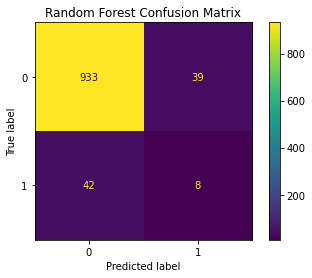

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Example for Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()
